In [1]:
import tensorflow as tf
print(tf.__version__)


2.15.0


IMPORTING DATASET from Tensorflow libraries

In [2]:
import tensorflow_datasets as tfds

imdb, info = tfds.load("imdb_reviews", with_info = True, as_supervised = True)

SPILITING dataset

In [3]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

In [4]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for s, l in train_data:
    training_sentences.append(s.numpy().decode('utf8'))
    training_labels.append(l.numpy())

for s, l in test_data:
    testing_sentences.append(s.numpy().decode('utf8'))
    testing_labels.append(l.numpy())



In [11]:

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

print(training_labels_final)
print(testing_labels_final)
print(type(training_labels_final))


[0 0 0 ... 0 0 1]
[1 1 0 ... 0 1 1]
<class 'numpy.ndarray'>


In [6]:
vocab = 100000
embedding_dim = 16
max_length = 120
trunc_type = 'post'

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab, oov_token = "<OOV>")
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen= max_length,truncating= trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen= max_length, truncating = trunc_type )

MODEL

In [16]:
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(vocab, embedding_dim, input_length = max_length),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dense(6, activation = 'relu'),
  tf.keras.layers.Dense(1, activation = 'sigmoid')
]
)

COMPILING MODEL

In [18]:
model.compile(loss ='binary_crossentropy',
               optimizer ='adam',
               metrics = 'accuracy')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           1600000   
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense_2 (Dense)             (None, 6)                 102       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 1600109 (6.10 MB)
Trainable params: 1600109 (6.10 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
num_epochs = 10

model.fit(padded,
          training_labels_final,  
          epochs=num_epochs,
          validation_data=(testing_padded, testing_labels_final))


Epoch 1/10
782/782 [==============================] - 21s 24ms/step - loss: 0.5356 - accuracy: 0.7605 - val_loss: 0.3763 - val_accuracy: 0.8409
Epoch 2/10
782/782 [==============================] - 19s 24ms/step - loss: 0.2967 - accuracy: 0.8808 - val_loss: 0.3363 - val_accuracy: 0.8553
Epoch 3/10
782/782 [==============================] - 20s 26ms/step - loss: 0.2056 - accuracy: 0.9243 - val_loss: 0.3407 - val_accuracy: 0.8539
Epoch 4/10
782/782 [==============================] - 21s 27ms/step - loss: 0.1439 - accuracy: 0.9527 - val_loss: 0.3641 - val_accuracy: 0.8489
Epoch 5/10
782/782 [==============================] - 21s 27ms/step - loss: 0.0987 - accuracy: 0.9688 - val_loss: 0.4078 - val_accuracy: 0.8424
Epoch 6/10
782/782 [==============================] - 18s 23ms/step - loss: 0.0658 - accuracy: 0.9816 - val_loss: 0.4680 - val_accuracy: 0.8324
Epoch 7/10
782/782 [==============================] - 18s 23ms/step - loss: 0.0422 - accuracy: 0.9904 - val_loss: 0.5283 - val_accuracy:

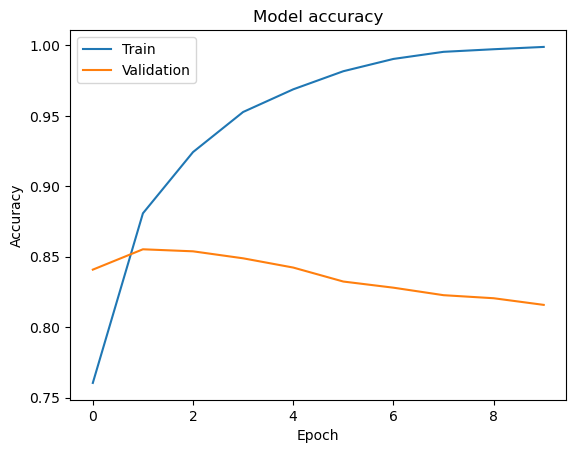

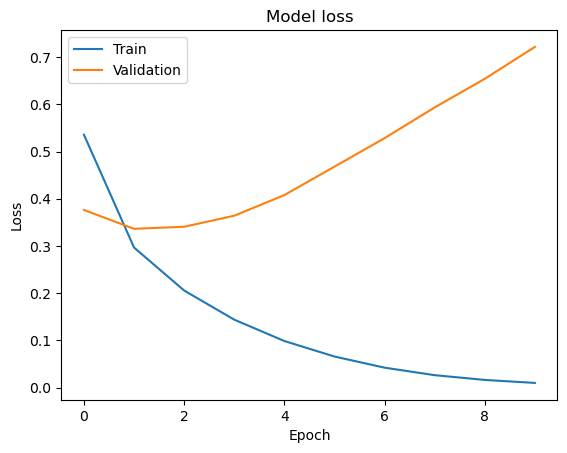

In [40]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [21]:
e = model.layers[0]
weight = e.get_weights()[0]
print(weight.shape)

(100000, 16)


In [81]:
# Preprocess input text
input_text = input("Enter your comment:")
input_sequence = tokenizer.texts_to_sequences([input_text])
input_padded = pad_sequences(input_sequence, maxlen=max_length, truncating=trunc_type)

# Predict sentiment
prediction = model.predict(input_padded)
print(prediction)

# Interpret prediction
if prediction >= 0.5:
    print(f"{input_text}\nPositive review")
else:
    print(f"{input_text}\nNegative review")


1/1 [==============================] - 0s 38ms/step
there is god , but where
Positive review
